# King County Housing EDA + Regression

**Can housing sale prices be determined by the features of this dataset?**  
We'll begin by exploring the data, cleaning it, and re-organizing it. Then we'll look at ways to modify and augment the data. Finally, we'll prepare the dataset for linear regression, and attempt to generate a model that can reasonably predict the sale prices for housing in King County, Washington, which is essentially the Greater Seattle Area.

In [2766]:
# import some basic tools and configurations
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}});

## EDA

### Importing
- 21597 datapoints
- 21 features
- A handful of NaNs and placeholder values

In [2767]:
# load the dataset and look around
data = pd.read_csv('kc_house_data.csv')
display(data.head())

len_before = len(data)
print("Dataset size: {}".format(len_before))
display(data.describe())
print("NaN info:")
print(data.isna().sum())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Dataset size: 21597


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


NaN info:
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


When I think of housing assessors, I think of the term "price per square foot." I read online that this is typically the square feet of the home, excluding the basement; the same as our `sqft_above` feature.

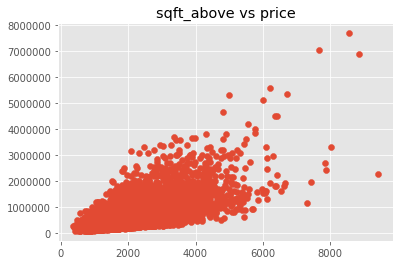

In [2768]:
plt.scatter(data['sqft_above'],data['price'])
plt.title('sqft_above vs price');

## Cleaning

### NaNs  
Explicit NaNs in columns:  
- waterfront  
- yr_renovated  
- view  

Waterfront NaNs: 2376


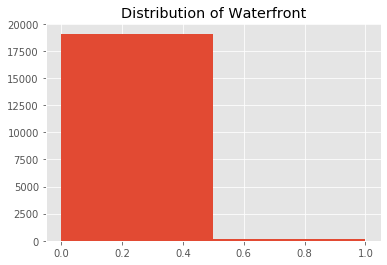

In [2769]:
print('Waterfront NaNs: {}'.format(data['waterfront'].isna().sum()))
data['waterfront'].hist(bins=2).set_title('Distribution of Waterfront');

Since 0 (not waterfront) is by far most likely, I'll just set the NaNs to that.

In [2770]:
data['waterfront'].fillna(0, inplace=True)

Although I expect `yr_renovated` to be insufficiently correlated to keep for regression, I might as well take care of the NaNs. Out of curiousity, I also aggregated the houses that had renovations and put their years thereof in a histogram.

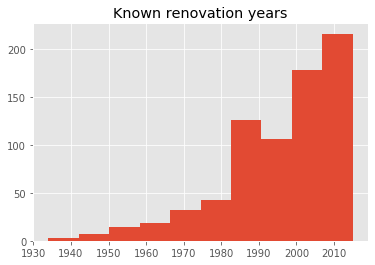

In [2771]:
data['yr_renovated'].fillna(0, inplace=True)
data['yr_renovated'] = data['yr_renovated'].astype(int)
data[data['yr_renovated'] > 0]['yr_renovated'].hist().set_title('Known renovation years');

Finally, let's look at `view`.

View NaNs: 63


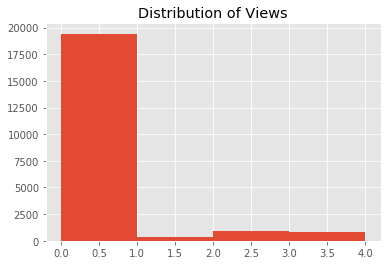

In [2772]:
print('View NaNs: {}'.format(data['view'].isna().sum()))
data['view'].hist(bins=4).set_title('Distribution of Views');

There are relatively few NaNs in `view`, and they aren't boolean like `waterfront`, so I feel comfortable dropping those datapoints entirely.

In [2773]:
data.dropna(inplace=True)

# count the datapoints lost in cleaning
print('Dataset Size\nBefore: {}\t After: {}\t Difference: {}'.format(
    len_before, len(data), (len_before - len(data))))

Dataset Size
Before: 21597	 After: 21534	 Difference: 63


### Placeholders
On first inspection of the data, I noticed `sqft_basement` had a placeholder value `'?'`.

In [2774]:
display(data['sqft_basement'].value_counts())
ph_count = len(data[data['sqft_basement'] == '?'])
print("Placeholders in `sqft_basement`: {}".format(ph_count))

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
1024.0        1
906.0         1
4130.0        1
652.0         1
1275.0        1
Name: sqft_basement, Length: 302, dtype: int64

Placeholders in `sqft_basement`: 452


It looks like ~60% of houses have no basement, so I'll throw the placeholders in with them.

In [2775]:
data.loc[data['sqft_basement'] == '?','sqft_basement'] = 0.

# a few dtypes to change
data['waterfront'] = data['waterfront'].astype(int)
data['view'] = data['view'].astype(int)
data['sqft_basement'] = data['sqft_basement'].astype(float).astype(int)

**How strong is the correlation between sale price and year of construction and/or renovation?**  

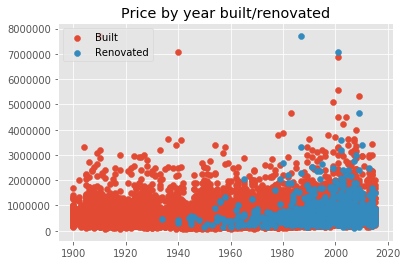

In [2776]:
plt.scatter(data['yr_built'],data['price']);
renovated = data.loc[data['yr_renovated'] > 0,'yr_renovated']
ren_price = data.loc[data['yr_renovated'] > 0,'price']
plt.scatter(renovated,ren_price)
plt.title("Price by year built/renovated")
plt.legend(["Built","Renovated"],loc='upper left');

Renovation year looks more relevant than construction year, but the number of non-renovations might drag this category down. Let's check it out just to be sure.

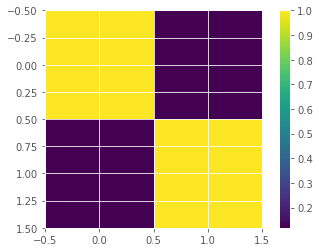

In [2777]:
corr_mat = np.corrcoef(data['yr_renovated'],data['price'])
plt.imshow(corr_mat,interpolation='nearest')
plt.colorbar()
plt.show()

**Year of construction and/or renovation are very weakly correlated to sale price.**

In [2778]:
data.drop('yr_built',axis=1,inplace=True)
data.drop('yr_renovated',axis=1,inplace=True)

### Outlier control
I'll use an isolation forest to make a quick pass for outliers. I'll use a low contamination ratio so it doesn't find outliers too harshly, since some noise is important in training a robust model.

In [2779]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(behaviour='new', contamination=0.04)

# only the columns that can have outlier values
floatints = data[['price','bedrooms','bathrooms','sqft_living',
                  'sqft_lot','floors','sqft_above','sqft_basement',
                  'sqft_living15','sqft_lot15']]

# -1 indicates outlier
data['cleaver'] = clf.fit_predict(floatints)

old_size = len(data)

indices = data[data['cleaver'] == -1].index
data.drop(indices, inplace=True)

new_size = len(data)
print('Isolation Forest removed {} outliers.'.format(old_size - new_size))

data.drop('cleaver',axis=1,inplace=True)

Isolation Forest removed 862 outliers.


## Feature engineering

### Neighborhoods
I suspect that the neighborhood and distance from nearest central buisness district may be important factors. Zipcodes could help with that, but they don't necessarily convey neighborhoods as experienced by residents.  

Instead, I'm going to drop zipcodes and use [this dataset I found online](https://gis-kingcounty.opendata.arcgis.com/datasets/neighborhood-centers-in-king-county-neighborhood-centers-point/data?page=5) to find each datapoint's nearest CBD and calculate the distance thereto.

In [2780]:
data.drop('zipcode',axis=1,inplace=True)
hoods = pd.read_csv('Neighborhood_Centers_in_King_County__neighborhood_centers_point.csv')
hoods.head(3)

,X,Y,OBJECTID,FEATURE_ID,CODE,NAME,ADDRESS,NEIGH_NUM,XCOORD,YCOORD,LONGITUDE,LATITUDE
0,-122.355548,47.723233,1,90001,Community Area/Business Center/Neighborhood,Bitter Lake Neighborhood,N 130th St & Greenwood Ave N,3,1.265776e+06,267518.406033,-122.355550,47.723232
1,-122.323274,47.708595,2,90002,Community Area/Business Center/Neighborhood,Northgate Neighborhood,NE Northgate Way & 5th Ave NE,28,1.273615e+06,262024.468858,-122.323276,47.708593
2,-122.295226,47.719280,3,90003,Community Area/Business Center/Neighborhood,Lake City Neighborhood,NE 125th & Lake City Way NE,21,1.280593e+06,265788.625044,-122.295228,47.719278


In [2781]:
from operator import itemgetter
from haversine import haversine # calculates distance given latitudes and longitudes

def find_cbd(df,hoods):
    ''' Finds nearest CBD and distance therefrom
    
    Parameters:
    df (pd.DataFrame): the King County Housing dataset
    hoods (pd.DataFrame): The Neighborhood Centers in King County dataset
    
    Returns:
    pd.DataFrame: a new dataframe containing nearest neighborhood and distance features
    
    '''
    nearest_hoods,dist_hoods = [],[]
    for row in df.iterrows():
        lat = row[1]['lat']
        lon = row[1]['long']
        to_cbd = []
        for hood in hoods.iterrows(): # consider all neighborhoods
            dist = haversine((lat,lon),
                             (hood[1]['LATITUDE'],hood[1]['LONGITUDE']),
                             unit='mi')
            to_cbd.append({'CBD' : hood[1]['NAME'],
                           'DIST' : dist})
        sortd = sorted(to_cbd, key=itemgetter('DIST')) # sort by distance, ascending
        nearest_hoods.append(sortd[0]['CBD']) # nearest CBD
        dist_hoods.append(sortd[0]['DIST']) # distance thereto
    new_panda = pd.DataFrame()
    new_panda['nearest_hoods'] = nearest_hoods
    new_panda['dist_hoods'] = dist_hoods
    return new_panda


# option to save because finding the 'hoods takes a little while

# saving
#hoods_data = find_cbd(data,hoods) # uncomment if saving
#hoods_data.to_csv('hoods_data.csv',index=False) # uncomment if saving

# loading
hoods_data = pd.read_csv('hoods_data.csv') # uncomment if loading

# join neighborhood data to the primary dataframe
data = pd.concat([data,hoods_data],join='inner',axis=1)

`nearest_hoods` will need to be numerically indexed.

In [2782]:
data[['nearest_hoods','dist_hoods','price']].head()

,nearest_hoods,dist_hoods,price
0,Rainier Beach Neighborhood,1.032990,221900.0
1,Northgate Neighborhood,0.879959,538000.0
2,Finn Hill Neighborhood,0.741188,180000.0
3,Morgan Junction Neighborhood,1.684835,604000.0
4,Eastgate Neighborhood,5.275227,510000.0


In [2783]:
data['nearest_hood'] = data['nearest_hoods'].astype('category')
data['nearest_hood'] = data['nearest_hood'].cat.codes # numerically index
data.drop('nearest_hoods',axis=1,inplace=True)
data[['nearest_hood','dist_hoods','price']].head()

,nearest_hood,dist_hoods,price
0,32,1.032990,221900.0
1,30,0.879959,538000.0
2,13,0.741188,180000.0
3,25,1.684835,604000.0
4,11,5.275227,510000.0


### Basement  
Because `sqft_basement` contains many `0.0` values (implying no basement), I originally implemented the commented-out code below, which turned the continuous variable into a boolean feature: either it has a basement or it doesn't. After testing this, however, it turned out that the model performed better with binned `sqft_basement` features, which is handled in a later section.

In [2709]:
#data['sqft_basement'] = data['sqft_basement'].astype(float)
#data['has_basement'] = [1 if x != 0. else 0 for x in data['sqft_basement']]
#data.drop('sqft_basement',axis=1,inplace=True)

### Date
**Are housing sale price trends are seasonally cyclic?**  
First I'll look at the number of houses sold by month, and then check the mean and median number of sales per month.  

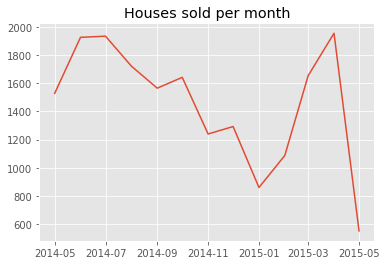

In [2784]:
from datetime import datetime

data['date'] = pd.to_datetime(data['date'],infer_datetime_format=False)

monthly_counts = data.groupby(data['date'].dt.strftime('%y/%m'))['price'].count().to_frame().reset_index()
monthly_counts['date'] = monthly_counts['date'].apply(lambda x: datetime.strptime(x,'%y/%m'))
plt.plot(monthly_counts['date'],monthly_counts['price'])
plt.title("Houses sold per month");
# don't trust the first or last months, since they may have began/ended polling mid-month

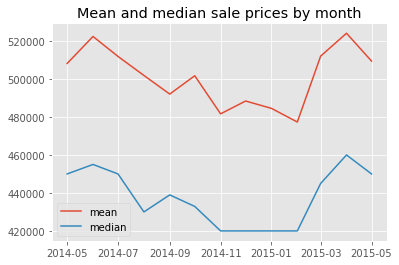

In [2785]:
monthly_means = data.groupby(data['date'].dt.strftime('%y/%m'))['price'].mean().to_frame().reset_index()
monthly_means['date'] = monthly_means['date'].apply(lambda x: datetime.strptime(x,'%y/%m'))
plt.plot(monthly_means['date'],monthly_means['price'])

monthly_medians = data.groupby(data['date'].dt.strftime('%y/%m'))['price'].median().to_frame().reset_index()
monthly_medians['date'] = monthly_medians['date'].apply(lambda x: datetime.strptime(x,'%y/%m'))
plt.plot(monthly_medians['date'],monthly_medians['price'])
plt.legend(["mean","median"])
plt.title("Mean and median sale prices by month");

**Sale prices may bear some cyclic nature,** but there isn't a long enough time-scale in the dataset to be certain. Experimentally, a `month_of_purchase` feature did not improve modeling.

In [2786]:
data.drop('date',axis=1,inplace=True)

### One-hot encoding

In [2787]:
def quick_dummies(df,column,drop_first=True):
    ''' Converts a dataframe column to dummies
    
    Parameters:
    df (pd.DataFrame): the dataframe in question
    column (str): the column name for conversion
    drop_first (bool): whether to drop dummy column with fewest positives
    
    Returns:
    pd.DataFrame: the modified copy of the dataframe
    
    '''
    dfc = df.copy()
    dummies = pd.get_dummies(dfc[column],prefix=column,drop_first=drop_first)
    dfc.drop(column,axis=1,inplace=True)
    dfc = pd.concat([dfc,dummies],axis=1)
    return dfc

# `grade` needs retyping
data['grade'] = data['grade'].astype('category')

# experimentally I found that > 6 rooms didn't matter much, so I'll bin them
data.loc[data['bedrooms'] >= 6,'bedrooms'] = 6

# the categorical columns
to_dummies = ['condition','view','floors','bedrooms','grade']

for col in to_dummies:
    data = quick_dummies(data,col)
    
print('Columns:')
display(data.head())

Columns:


,id,price,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,...,bedrooms_6,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,7129300520,221900.0,1.00,1180,5650,0,1180,0,47.5112,-122.257,...,0,0,0,0,1,0,0,0,0,0
1,6414100192,538000.0,2.25,2570,7242,0,2170,400,47.7210,-122.319,...,0,0,0,0,1,0,0,0,0,0
2,5631500400,180000.0,1.00,770,10000,0,770,0,47.7379,-122.233,...,0,0,0,1,0,0,0,0,0,0
3,2487200875,604000.0,3.00,1960,5000,0,1050,910,47.5208,-122.393,...,0,0,0,0,1,0,0,0,0,0
4,1954400510,510000.0,2.00,1680,8080,0,1680,0,47.6168,-122.045,...,0,0,0,0,0,1,0,0,0,0


### Binning
I've made a list `to_cut` of continuous features that might do better as binned categoricals. First I'll plot them, and keep the somewhat linearly related features.

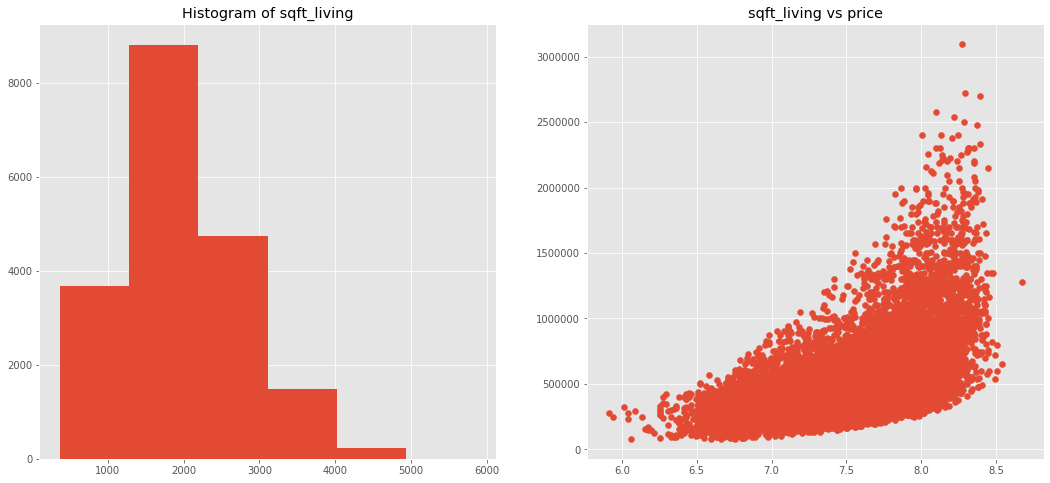

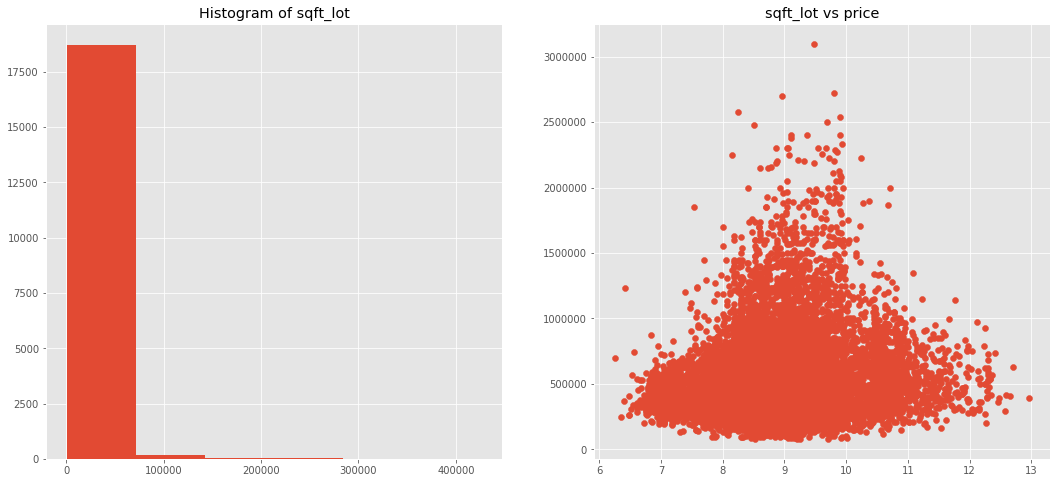

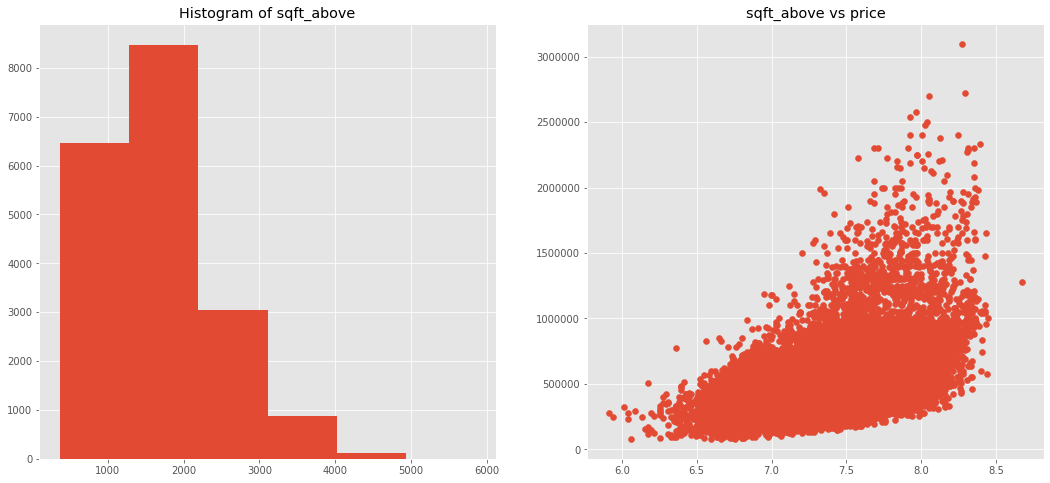

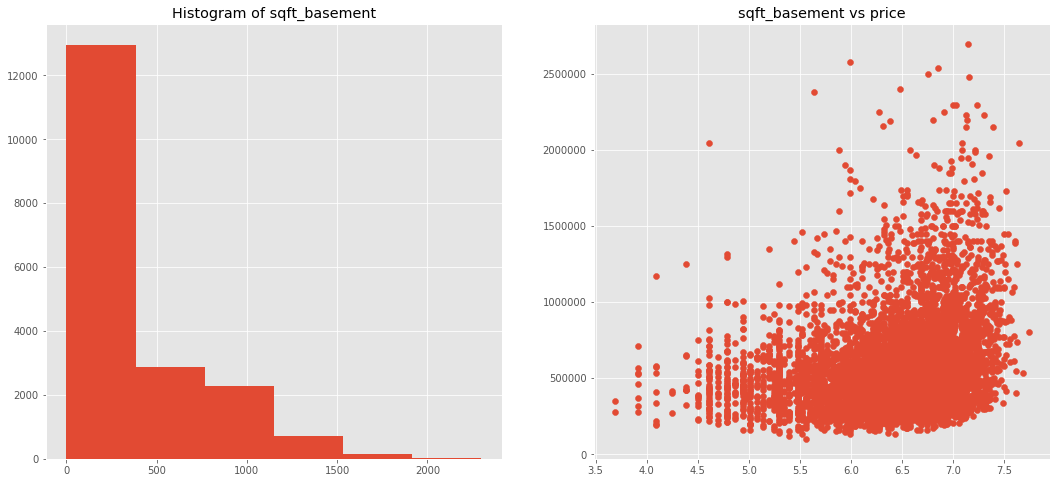

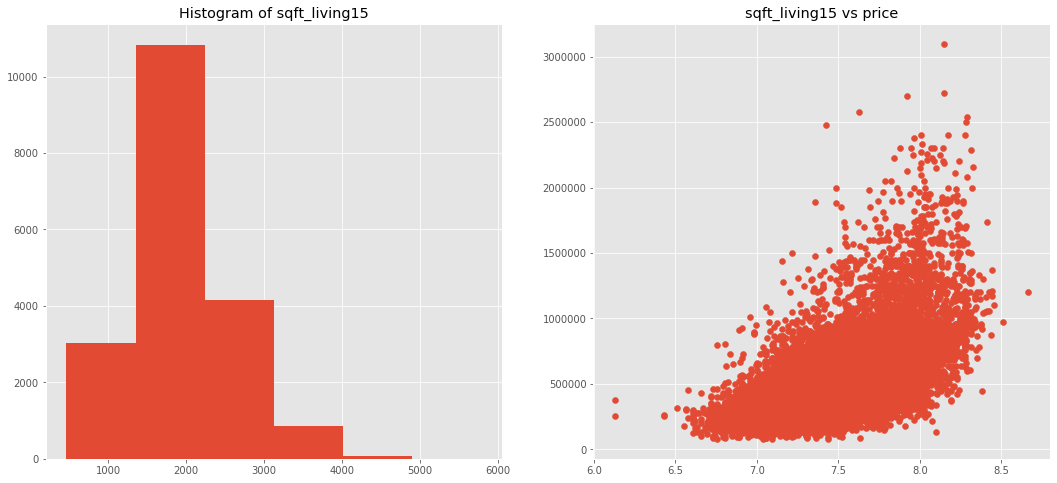

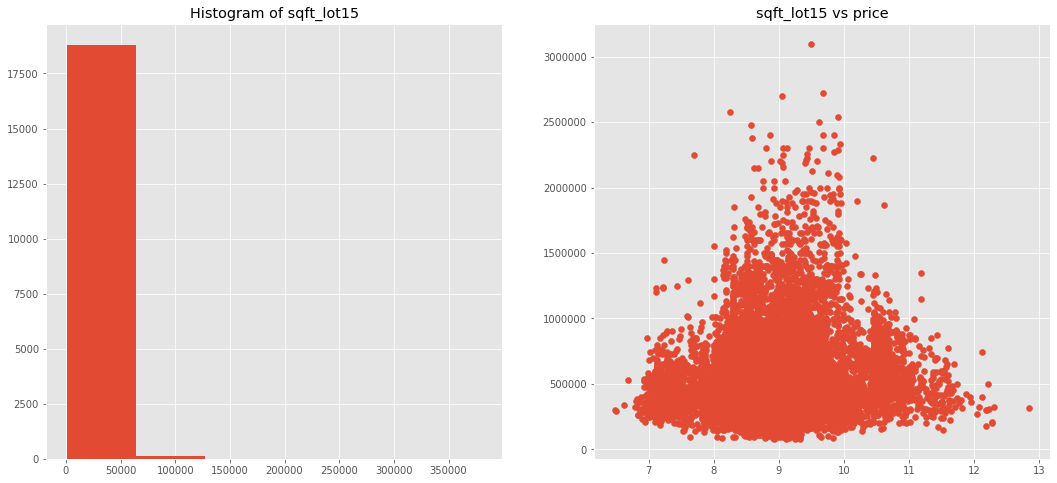

In [2792]:
to_cut = ['sqft_living','sqft_lot','sqft_above',
          'sqft_basement','sqft_living15','sqft_lot15']

for col in to_cut:
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    data[col].hist(bins=6)
    plt.title('Histogram of {}'.format(col))
    plt.subplot(1,2,2)
    plt.scatter(np.log(data[col]),data['price'])
    plt.title('{} vs price'.format(col));

In [2793]:
to_cut = ['sqft_basement','sqft_lot15'] # okay, just these ones

def quick_cut(df,column,q=6,drop_first=True):
    ''' Converts a continuous dataframe column to quantile-binned dummies
    
    Parameters:
    df (pd.DataFrame): the dataframe in question
    column (str): the column name for conversion
    q (int): quantiles at which to slice
    drop_first (bool): whether to drop dummy column with fewest positives
    
    Returns:
    pd.DataFrame: the modified copy of the dataframe
    
    '''
    dfc = df.copy()
    temp = pd.qcut(dfc[column],q,duplicates='drop')
    temp = pd.get_dummies(temp,prefix=column,drop_first=drop_first)
    dfc.drop(column,axis=1,inplace=True)
    dfc = pd.concat([dfc,temp],axis=1)
    return dfc

for col in to_cut:
    data = quick_cut(data,col)
    
# I'm also going to bin and one-hot the `bathrooms` category.
# I did this manually because I wanted to select the bins.
# I selected these bins by measuring each `bathrooms`' impact on linear regressions
bins = [0., 2.,2.,4.,4.,8.]
temp = pd.cut(data['bathrooms'],bins,duplicates='drop')
temp = pd.get_dummies(temp,prefix='bathrooms_',drop_first=True)
data.drop('bathrooms',axis=1,inplace=True)
data = pd.concat([data,temp],axis=1,join='inner')

data.head()

,id,price,sqft_living,sqft_lot,waterfront,sqft_above,lat,long,sqft_living15,dist_hoods,...,grade_12,"sqft_basement_(320.0, 760.0]","sqft_basement_(760.0, 2300.0]","sqft_lot15_(4600.0, 6146.333]","sqft_lot15_(6146.333, 7684.0]","sqft_lot15_(7684.0, 9000.0]","sqft_lot15_(9000.0, 11600.0]","sqft_lot15_(11600.0, 380279.0]","bathrooms__(2.0, 4.0]","bathrooms__(4.0, 8.0]"
0,7129300520,221900.0,1180,5650,0,1180,47.5112,-122.257,1340,1.032990,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,538000.0,2570,7242,0,2170,47.7210,-122.319,1690,0.879959,...,0,1,0,0,1,0,0,0,1,0
2,5631500400,180000.0,770,10000,0,770,47.7379,-122.233,2720,0.741188,...,0,0,0,0,0,1,0,0,0,0
3,2487200875,604000.0,1960,5000,0,1050,47.5208,-122.393,1360,1.684835,...,0,0,1,1,0,0,0,0,1,0
4,1954400510,510000.0,1680,8080,0,1680,47.6168,-122.045,1800,5.275227,...,0,0,0,0,1,0,0,0,0,0


### Transformation
There's quite a bit of skew to the data. **Could some transformations ameliorate this?**  
For each feature, the left histogram shows the current distribution, the center shows the log of the same to reduce right-skewedness, while the right shows the same feature squared to reduce left-skewedness.

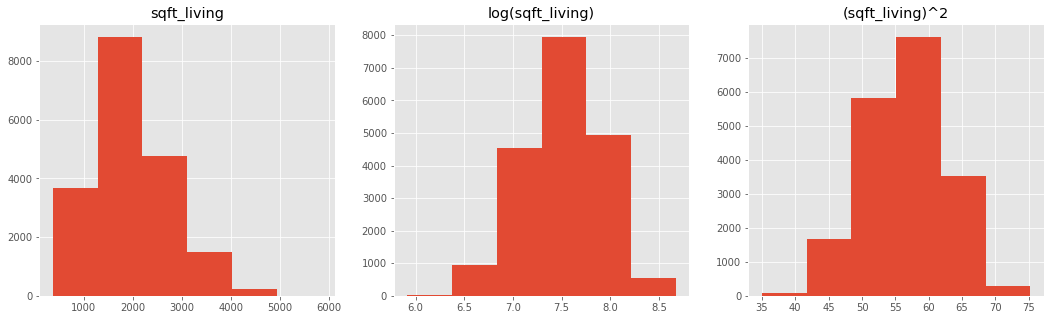

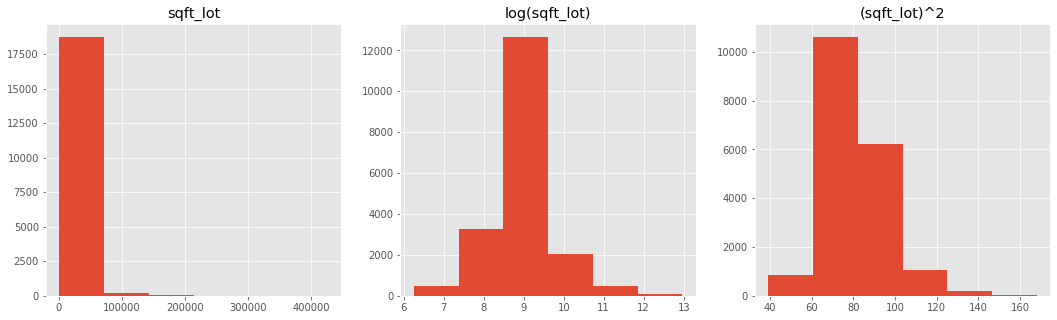

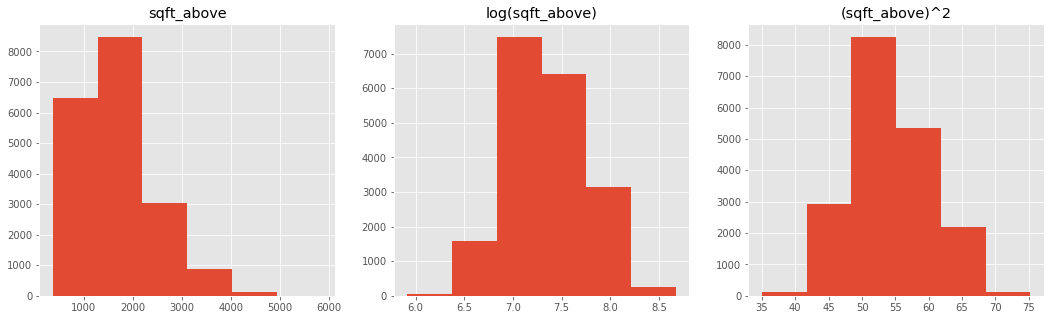

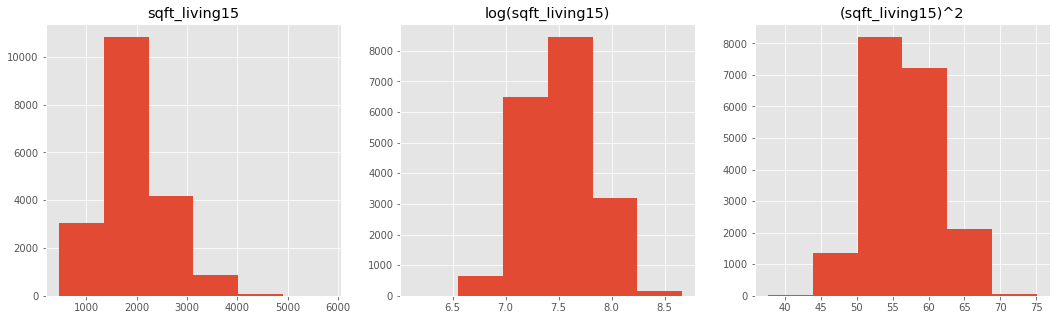

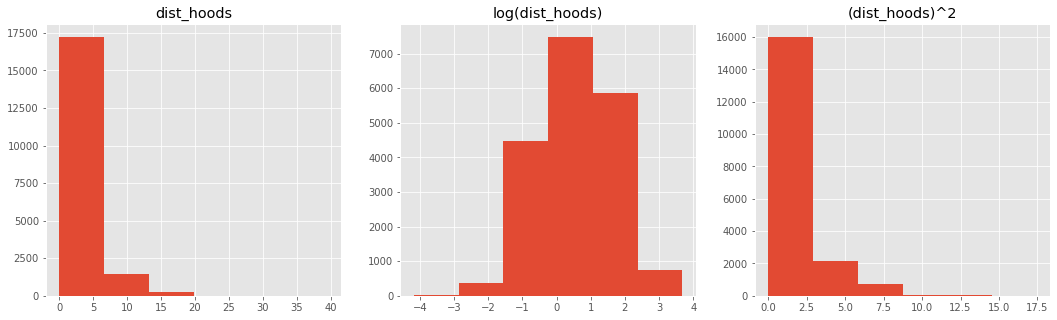

In [2794]:
qdata = data.copy()
to_transform = ['sqft_living','sqft_lot','sqft_above','sqft_living15','dist_hoods']

for col in to_transform:
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    data[col].hist(bins=6)
    plt.title('{}'.format(col))
    plt.subplot(1,3,2)
    qdata[col] = np.log(qdata[col])
    qdata[col].hist(bins=6)
    plt.title('log({})'.format(col));
    plt.subplot(1,3,3)
    qdata[col] = np.square(qdata[col])
    qdata[col].hist(bins=6)
    plt.title('({})^2'.format(col));
    
del qdata

Based on the above visualizations, it looks like **transformations could indeed reduce some skewness.**

In [2717]:
data['dist_hoods'] = np.log(data['dist_hoods'])
data['sqft_above'] = np.log(data['sqft_above'])
data['sqft_lot'] = np.log(data['sqft_lot'])
data['sqft_living15'] = np.square(data['sqft_living15'])

## Linear Regression
I'll begin by dropping unnecessary features, and assigning the target feature to `y`.

In [2718]:
X = data.copy()

# features no longer necessary
X.drop('lat',axis=1,inplace=True)
X.drop('long',axis=1,inplace=True)
X.drop('id',axis=1,inplace=True)

y = X.pop('price') # remove 'price' from X and save as y

### P-values and feature importance
Statsmodels OLS is a good place to start.

In [2719]:
import statsmodels.api as sm

_X = sm.add_constant(X)
est = sm.OLS(y,_X).fit()
est.summary()

C:\Users\root\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     654.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:10:40   Log-Likelihood:            -2.5577e+05
No. Observations:               18975   AIC:                         5.116e+05
Df Residuals:                   18931   BIC:                         5.120e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1.779e+05   1.93e+05      0.923      0.356      -2e+05    5.56e+05
sqft_living                       95.4606      7.153     13.346      0.000      81.441     109.481
sqft_lot                       -1.138e+04   3213.293     -3.542      0.000   -1.77e+04   -5083.208
waterfront                      2.759e+05   2.16e+04     12.764      0.000    2.34e+05    3.18e+05
sqft_above                      2.325e+04   1.29e+04      1.805      0.071   -1995.132    4.85e+04
sqft_living15                      0.0154      0.001     20.143      0.000       0.014       0.017
dist_hoods                       368.3584   1193.262      0.309      0.758   -1970.541    2707.258
nearest_hood                     225.8248    104.694      2.157      0.031      20.615     431.034
condition_2                    -1.501e+04   3.56e+04     -0.422      0.673   -8.47e+04    5.47e+04
condition_3                    -1.533e+04    3.3e+04     -0.464      0.643   -8.01e+04    4.94e+04
condition_4                      3.05e+04   3.31e+04      0.922      0.356   -3.43e+04    9.53e+04
condition_5                      8.76e+04   3.33e+04      2.633      0.008    2.24e+04    1.53e+05
view_1                          1.112e+05   1.03e+04     10.840      0.000    9.11e+04    1.31e+05
view_2                          7.656e+04   6355.450     12.046      0.000    6.41e+04     8.9e+04
view_3                          1.278e+05   9070.826     14.086      0.000     1.1e+05    1.46e+05
view_4                          2.674e+05    1.4e+04     19.150      0.000     2.4e+05    2.95e+05
floors_1.5                      5.255e+04   4876.768     10.775      0.000     4.3e+04    6.21e+04
floors_2.0                     -3.472e+04   4492.916     -7.728      0.000   -4.35e+04   -2.59e+04
floors_2.5                      9.143e+04   1.89e+04      4.825      0.000    5.43e+04    1.29e+05
floors_3.0                     -2.369e+04   1.13e+04     -2.098      0.036   -4.58e+04   -1554.924
floors_3.5                     -4.759e+04   8.68e+04     -0.548      0.584   -2.18e+05    1.23e+05
bedrooms_2                      3568.9319   1.39e+04      0.257      0.797   -2.36e+04    3.08e+04
bedrooms_3                     -2.332e+04    1.4e+04     -1.664      0.096   -5.08e+04    4157.355
bedrooms_4                     -3.047e+04   1.43e+04     -2.126      0.034   -5.86e+04   -2374.372
bedrooms_5                     -2.132e+04   1.51e+04     -1.409      0.159    -5.1e+04    8343.391
bedrooms_6                     -2.338e+04   1.85e+04     -1.261      0.207   -5.97e+04     1.3e+04
grade_4                         -4.42e+04   1.77e+05     -0.250      0.802    -3.9e+05    3.02e+05
grade_5                        -5.364e+04   1.74e+05     -0.308      0.758   -3.95e+05    2.87e+05
grade_6       

I can use the p-values from these OLS regression results to winnow my features.

In [2735]:
# remove all features with p-value greater than 0.05
cols_before = len(X.columns)

for col in X.columns:
    if (est.pvalues > 0.05)[col]:
        X.drop(col,axis=1,inplace=True)

# this feature didn't show up in OLS summary as having a p-value greater than 0.05, but it does.
X.drop('sqft_basement_(760.0, 2170.0]',axis=1,inplace=True)
        
cols_after = len(X.columns)
print("{} of {} columns removed for p-values greater than .05".format((cols_before - cols_after), cols_before))

18 of 43 columns removed for p-values greater than .05


### Scale feature values
SKLearn's `MinMaxScaler` quickly scales values to the interval (0,1).

In [2722]:
from sklearn.preprocessing import MinMaxScaler

# separate scalers so we can encode/decode separately
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# scale everything to between 0 and 1
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.ravel().reshape(-1,1))

### Train/test split  
A separate validation subset will be split from the training subset during fitting.

In [2724]:
from sklearn.model_selection import train_test_split as tts

X_train,X_test,y_train,y_test = tts(X_scaled,y_scaled,test_size=0.1,random_state=31)

### Simple linear regression
Based on the first OLS, I've removed several features and scaled the data. Let's see how well it'll work now.

In [2795]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression().fit(X_train,y_train)
preds = lr.predict(X_test)

print("R-squared score: {}".format(r2_score(y_test,preds)))

R-squared score: 0.6203002367920549


Not bad, however I suspect neural networks can step it up a notch.

In [2726]:
from sklearn.ensemble import RandomForestRegressor as rfr
def get_importances(top_n=0):
    ''' displays ranked feature importances for this dataset only '''
    assert type(top_n) == int and top_n <= len(X.columns)
    rf = rfr(n_estimators=10)
    rf.fit(X_scaled,y_scaled.ravel())
    importances = rf.feature_importances_
    imp_list = []
    for i,col in enumerate(X.columns):
        imp_list.append({'column':col,'importance':importances[i]})
    if top_n == 0:
        display(sorted(imp_list,key=lambda x:x['importance'],reverse=True))
    else:
        display(sorted(imp_list,key=lambda x:x['importance'],reverse=True)[:top_n])
    
#get_importances() # used in testing

In [2727]:
def check_corre():
    ''' displays a correlation matrix for this dataset only '''
    corre = X.corr()
    display(corre.style.background_gradient(cmap='coolwarm').set_precision(3))

#check_corre() # used in testing

In [2728]:
# a little cleanup
import gc
gc.collect()

304493

### Regression with Keras
This was the first way I learned to do regression, so naturally I tend toward it.

In [2729]:
import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [2730]:
K.clear_session()

def build_model():
    ''' builds, compiles, and returns the pre-defined Keras model '''
    entry = L.Input(shape=(X_train.shape[1],))
    x = L.Dense(128)(entry)
    x = L.LeakyReLU()(x)   
    x = L.Dense(64)(x)
    x = L.LeakyReLU()(x)
    x = L.Dense(14,kernel_regularizer=l2(2e-4))(x)
    x = L.Dense(1)(x)

    model = Model(entry, x)
    model.compile(loss='mse',optimizer='adam')
    return model

In fitting this model, some data is randomly separated for epoch-based model validation. I've noticed over many iterations of testing that results vary depending on what data gets cut off. For this reason, I'll employ k-folds, and measure their aggregate performance.

In [2731]:
fold_preds = pd.DataFrame() # dataframe to put fold predictions in
num_folds = 3

# `fit` takes care of data randomizing
for i in range(1,num_folds+1):
    # callbacks to end training naturally
    reduce_lr = ReduceLROnPlateau(patience=5,min_lr=1e-7)
    early_stop = EarlyStopping(patience=8)
    
    # new model for every fold
    model = build_model()
    
    # fit model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, verbose=0, callbacks=[reduce_lr,early_stop])
    
    # predict
    preds = np.squeeze(model.predict(X_test))
    print("[Fold {}/{}] R-squared score: {}".format(i,num_folds,r2_score(y_test,preds)))
    fold_preds['fold_{}'.format(i)] = preds

[Fold 1/3] R-squared score: 0.6512237549824842
[Fold 2/3] R-squared score: 0.6548677647029086
[Fold 3/3] R-squared score: 0.6541843625518521


In [2732]:
folded_preds = fold_preds.sum(axis=1) / num_folds
print("Final R-squared score: {}".format(r2_score(y_test,folded_preds)))

Final R-squared score: 0.6567208119844701


In [2764]:
# let's look at the ground-truth and predictions side by side
edf = pd.DataFrame()
edf['gt'] = np.squeeze(y_scaler.inverse_transform(y_test))
edf['pred'] = np.squeeze(y_scaler.inverse_transform(folded_preds.ravel().reshape(-1,1)))
edf['pred'] = edf['pred'].apply(lambda x: round(x,-2)) # match precision
print('Sample of ground-truth vs keras model predictions')
edf[50:55]

Sample of ground-truth vs keras model predictions


,gt,pred
50,422000.0,504000.0
51,469000.0,419100.0
52,249000.0,287100.0
53,250000.0,277300.0
54,552500.0,544400.0


## Discussion
After cleaning the dataset, transforming some variables and binning others, and narrowing down the relevant features, an r-squared score tends to fall between ~0.61 to ~0.66 depending on the randomly split data.  
Although several features have high multicollinearity, linear regression r-squared scores are consistently improved by including those variables anyway. I suspect this implies that the importance of their correlation to the target is greater than the detrement of their intercollinearity.  

### Features
A random forest regressor can quickly quantify feature importance.

In [2753]:
get_importances(top_n=4)

[{'column': 'sqft_living', 'importance': 0.4720969428909871},
 {'column': 'sqft_living15', 'importance': 0.15054583535434468},
 {'column': 'sqft_lot', 'importance': 0.13681885213655495},
 {'column': 'nearest_hood', 'importance': 0.06144589074646237}]

- `sqft_living` is, by far, the most important feature, which should come as no surprise, since, in urban areas like (the majority of) King County, that's usually most of what's being purchased.  

- Since `sqft_living` is a strong indicator of `price`, `sqft_living15` contributes an indication of nearby property values, indicating the regularity of `sqft_living` relative to `price`, and perhaps indicating overall affluence of the neighborhood.  

- `sqft_lot` was almost as important as `sqft_living15`, which I suspect becomes relevant when `sqft_lot - sqft_living` is substantial, since this might imply a large lot uncommon in urban living, thereby perhaps indicating a degree of affluence that can function as a scaling variable.

- Our engineered feature `nearest_hood` made it into the top features, so that's neat. Although this is a categorical variable, I've read in the past that it typically makes little difference whether it's one-hot or not, and this held up experimentally in this case.  

Ultimately, binning some of the continuous features (e.g. `sqft_lot15`) and one-hot encoding of categorical features (e.g. `view`) made little difference in model performance. Theoretically this representation requires less stored data, although this is negligible for a dataset of this size.  

The `sqft_basement` feature, as mentioned before, performed better binned than as a boolean (has basement or doesn't), even though only one bin survived p-value cleaving.

The histogram of `log(sqft_living15)` looks best, but square transformation performs better. Similarly, the right skewness of `sqft_living` makes it seem like a logarithmic transformation might be helpful, but leaving it alone performs better.

Although I simply dropped the `yr_built` and `yr_renovation` features for their weak correlation to `price`, I suspect that there may be better relationships when they're considered in conjunction with the date of sale. As an example, consider a feature such as `time since renovation`, which might look something like `(year of sale) - (year of renovation)`. Future modeling of such a dataset may be improved by datetime considerations such as this.

### Model
With modest effort, regression with neural networks provides an R-squared improvement of about ~0.05. The layer sizes, activation functions, and regularization were selected by experimentation. Although other were tested, Adam out-performed all vanilla optimizers, as is typically the case.  

The model takes an input of 25 features, in the following order and with respective dtypes:
- sqft_living (float)
- sqft_lot (float)
- waterfront (boolean)
- sqft_living15 (float)
- nearest_hood (float)
- condition_5 (boolean)
- view_1 (boolean)
- view_2 (boolean)
- view_3 (boolean)
- view_4 (boolean)
- floors_1.5 (boolean)
- floors_2.0 (boolean)
- floors_2.5 (boolean)
- floors_3.0 (boolean)
- bedrooms_4 (boolean)
- grade_10 (boolean)
- grade_11 (boolean)
- grade_12 (boolean)
- sqft_basement_(320.0, 760.0] (boolean)
- sqft_lot15_(4600.0, 6150.0] (boolean)
- sqft_lot15_(6150.0, 7688.0] (boolean)
- sqft_lot15_(7688.0, 9000.0] (boolean)
- sqft_lot15_(9000.0, 11632.0] (boolean)
- sqft_lot15_(11632.0, 380279.0] (boolean)
- bathrooms__(2.0, 4.0] (boolean)

All variables, including target `price`, were scaled to the interval (0,1). Thus predictions must be inversely transformed *by the same scaler object* to produce the projected sale price.

### Specificity to King County, Washington
This model should not be considered relevant for any other geographic region.

## Conclusion
Modeling housing sale prices is clearly difficult. Variance in model performance across randomized train/test splits may suggest that a reliable model would require a larger dataset. Nevertheless, given the subjective nature of assessments by the city, seller, realtor, and buyer, a more comprehensive model may be possible with the inclusion of more subjective features. For example, given sufficient time and compensation, one might integrate satellite or street-view imagery (e.g. [Planet Labs](https://www.planet.com/)) into the network. Or, less ambitiously, using a map interface to locate nearest points of interest (dining, grocery, childcare, medical care, etc.) and distances thereto may further improve model performance. As always, these results demonstrate the need for further research.